<a href="https://colab.research.google.com/github/EugeniaBar/Proyectoscompletos/blob/main/Predictor_de_riezgo_ACV_mlflow(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn



In [ ]:
pip install mlflow

   ---------------------------------------- 0.0/29.0 MB ? eta -:--:--
    --------------------------------------- 0.5/29.0 MB 15.9 MB/s eta 0:00:02
   - -------------------------------------- 1.0/29.0 MB 13.3 MB/s eta 0:00:03
   -- ------------------------------------- 1.6/29.0 MB 12.9 MB/s eta 0:00:03
   --- ------------------------------------ 2.3/29.0 MB 13.2 MB/s eta 0:00:03
   --- ------------------------------------ 2.8/29.0 MB 13.0 MB/s eta 0:00:03
   ---- ----------------------------------- 3.4/29.0 MB 13.4 MB/s eta 0:00:02
   ----- ---------------------------------- 3.9/29.0 MB 13.2 MB/s eta 0:00:02
   ------ --------------------------------- 4.5/29.0 MB 12.9 MB/s eta 0:00:02
   ------ --------------------------------- 5.0/29.0 MB 13.3 MB/s eta 0:00:02
   ------- -------------------------------- 5.5/29.0 MB 13.1 MB/s eta 0:00:02
   -------- ------------------------------- 6.2/29.0 MB 13.3 MB/s eta 0:00:02
   --------- ------------------------------ 6.8/29.0 MB 13.2 MB/s eta 0:

In [ ]:
# Selección de librerias para trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Cargar el dataset seleccionado
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Primera exploración
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación general:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras filas del dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Valores nulos por columna:
id                     0
gender                 0
age                    0
hypertension           0
he

In [ ]:
# Eliminamos valores nulos
df = df.dropna()

# Eliminamos 'id' porque no aporta al modelo
df = df.drop(columns=['id'])

# Codificación de variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns

# Usamos LabelEncoder para simplificar
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Separar características y objetivo
X = df.drop('stroke', axis=1)
y = df['stroke']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Entrenamiento de un modelo inicial
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")



Matriz de confusión:
[[938   2]
 [ 42   0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982


Accuracy: 0.9552


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Iniciar tracking de MLflow
mlflow.set_experiment("Predicción de ACV 1")

with mlflow.start_run():

    # ENTRENAMIENTO
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # MÉTRICAS
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    # PARAMETROS
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 5)
    mlflow.log_param("random_state", 42)

    # MÉTRICAS
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", auc)

    # GUARDAR MODELO
    mlflow.sklearn.log_model(model, "modelo_rf")

    print(f"Tracking registrado: Accuracy={acc:.2f}, AUC={auc:.2f}")


2025/06/10 22:06:23 INFO mlflow.tracking.fluent: Experiment with name 'Predicción de ACV 1' does not exist. Creating a new experiment.
C:\Users\FGurr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2025/06/10 22:06:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Tracking registrado: Accuracy=0.96, AUC=0.79


In [ ]:
from sklearn.utils import resample

# Separar clases
df_minority = df[df['stroke'] == 1]
df_majority = df[df['stroke'] == 0]

# Aumentar la clase minoritaria con Bootstrap (muestreo con reemplazo)
df_minority_boot = resample(df_minority,
                            replace=True,
                            n_samples=1000,  # o igualar al tamaño de la clase mayoritaria
                            random_state=42)

# Combinar con clase mayoritaria
df_balanced = pd.concat([df_majority, df_minority_boot])

# Verificar nuevo balance
print(df_balanced['stroke'].value_counts(normalize=True))


stroke
0    0.824561
1    0.175439
Name: proportion, dtype: float64


| Clase        | Proporción Original | Proporción Nueva |
| ------------ | ------------------- | ---------------- |
| `stroke = 1` | \~4.9%              | **17.5%**        |
| `stroke = 0` | \~95.1%             | **82.5%**        |


Este nuevo dataset está menos desbalanceado, aunque no completamente balanceado (lo cual puede ser bueno: balancear al 100% a veces genera overfitting si no se maneja bien). Este 17.5% puede ser una buena base



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


--- Logistic Regression ---
Accuracy: 0.8350877192982457
Precision: 0.5630252100840336
Recall: 0.268
F1 Score: 0.36314363143631434
ROC AUC: 0.8377497872340425

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1175
           1       0.56      0.27      0.36       250

    accuracy                           0.84      1425
   macro avg       0.71      0.61      0.63      1425
weighted avg       0.81      0.84      0.81      1425



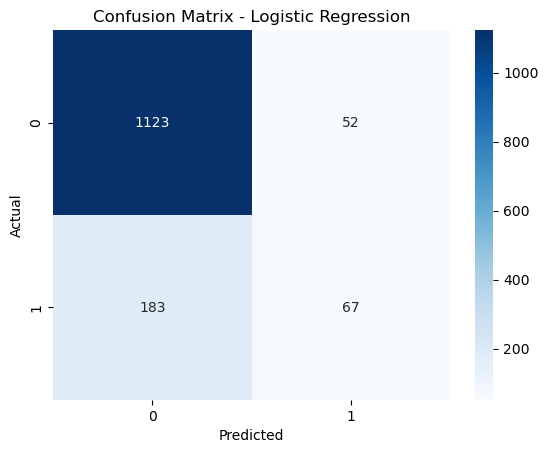


--- Random Forest ---
Accuracy: 0.9873684210526316
Precision: 0.9461538461538461
Recall: 0.984
F1 Score: 0.9647058823529412
ROC AUC: 0.9949174468085107

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1175
           1       0.95      0.98      0.96       250

    accuracy                           0.99      1425
   macro avg       0.97      0.99      0.98      1425
weighted avg       0.99      0.99      0.99      1425



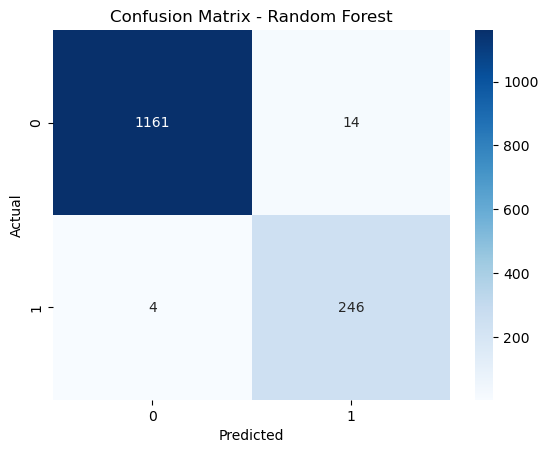

In [ ]:
# Preprocesamiento
df_model = df_balanced.copy()

# Eliminar columnas innecesarias si las hay (como 'id' o similares)
df_model = df_model.drop(columns=['id'], errors='ignore')

# Codificar variables categóricas
df_model = pd.get_dummies(df_model, drop_first=True)

# Separar variables y target
X = df_model.drop('stroke', axis=1)
y = df_model['stroke']

# Escalar variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=42)

# Entrenar modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Visualizar la curva ROC y calcular AUC

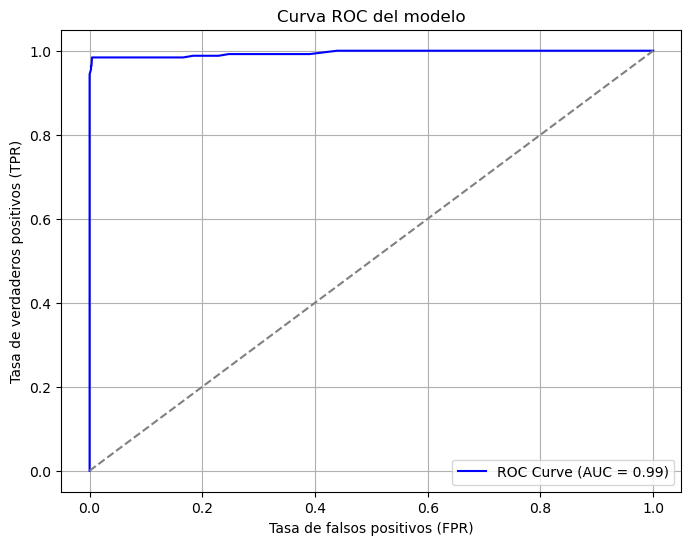

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener probabilidades de predicción para la clase 1
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calcular AUC
auc_score = roc_auc_score(y_test, y_probs)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC del modelo")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Iniciar tracking de MLflow
mlflow.set_experiment("Predicción de ACV 2")

with mlflow.start_run():

    # ENTRENAMIENTO
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # MÉTRICAS
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    # PARAMETROS
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 5)
    mlflow.log_param("random_state", 42)

    # MÉTRICAS
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", auc)

    # GUARDAR MODELO
    mlflow.sklearn.log_model(model, "modelo_rf")

    print(f"Tracking registrado: Accuracy={acc:.2f}, AUC={auc:.2f}")

2025/06/10 22:06:33 INFO mlflow.tracking.fluent: Experiment with name 'Predicción de ACV 2' does not exist. Creating a new experiment.
2025/06/10 22:06:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Tracking registrado: Accuracy=0.86, AUC=0.88


In [ ]:
!ls /content/drive/MyDrive/mlflow_runs/586779104079326043/$run_id/artifacts/modelo_titanic

In [ ]:
https://drive.google.com/file/d/1mOUi9HDnChh6QTMfGFikHkrm6-P_2BHd/view?usp=drive_link